# Assignment 4 - Tutorial

Simple analytical model        

__41934 - Advanced BIM, E23__

Kaare G. S. Hansen, s214282 - DTU


## Imports

In [1]:
import pyconbim.geomUtils as geomUtils
import pyconbim.ifcUtils as ifcUtils
from pyconbim.rendering import *
import pyconbim.utils as utils
import pyconbim.analyticalModel as analyticalModel

## Load models

In [6]:
models = ifcUtils.load_models(model_dir='../models',
                     models={
                         'simple-frame-with-slab-wall': 'simple-frame-with-slab-wall.ifc',
                         'LLYN - STRU': 'LLYN - STRU.ifc',
                        #  'ark': 'LLYN - ARK.ifc',
                             })
model = models['simple-frame-with-slab-wall']

2023-11-26 21:22:46.153 | INFO     | pyconbim.ifcUtils:load_models:77 - File path, simple-frame-with-slab-wall: ../models\simple-frame-with-slab-wall.ifc
2023-11-26 21:22:46.171 | INFO     | pyconbim.ifcUtils:load_models:79 - Model schema: IFC4

2023-11-26 21:22:46.171 | INFO     | pyconbim.ifcUtils:load_models:77 - File path, LLYN - STRU: ../models\LLYN - STRU.ifc
2023-11-26 21:22:46.570 | INFO     | pyconbim.ifcUtils:load_models:79 - Model schema: IFC4



## Topics

- Connections, intersection
- Ifc axis are not reliable
- 

## Geometry analysis

Ifc-axis may not be usable.

### False axis

We cannot necessarily depend on the representations and geometry that is directly provided by the model.

In `LLYN - STRU.ifc`, there happens to be some axis representations that do not correspond properly with their actual body representaion.

First we load our model:

In [7]:
model = models['LLYN - STRU']
modelData = ifcUtils.ModelData(model)

2023-11-26 21:22:50.370 | INFO     | pyconbim.ifcUtils:processGeometry:120 - Beginning processing with 12 threads...
2023-11-26 21:22:50.463 | INFO     | pyconbim.ifcUtils:processGeometry:131 - Progress: 0%
2023-11-26 21:22:50.633 | INFO     | pyconbim.ifcUtils:processGeometry:131 - Progress: 16%
2023-11-26 21:22:50.844 | INFO     | pyconbim.ifcUtils:processGeometry:131 - Progress: 28%
2023-11-26 21:22:51.820 | INFO     | pyconbim.ifcUtils:processGeometry:131 - Progress: 43%
2023-11-26 21:22:53.591 | INFO     | pyconbim.ifcUtils:processGeometry:131 - Progress: 55%
2023-11-26 21:22:55.070 | INFO     | pyconbim.ifcUtils:processGeometry:131 - Progress: 100%
2023-11-26 21:22:55.205 | INFO     | pyconbim.ifcUtils:processGeometry:131 - Progress: 100%
2023-11-26 21:22:55.268 | INFO     | pyconbim.ifcUtils:processGeometry:131 - Progress: 100%
2023-11-26 21:22:55.272 | INFO     | pyconbim.ifcUtils:processGeometry:152 - Processed 3601 items
2023-11-26 21:22:55.272 | INFO     | pyconbim.ifcUtils:

Now we will have a look at one of the beams at the roof, specifically the beam with GUID `0b06gcHN58zxrRFHHpcInr`. Feel free to explore this in the fully loaded model for yourself.

This beam happens to have an incorrect axis. It has two representations: `Body` and `Axis`:

In [17]:
beam = model.by_guid('0b06gcHN58zxrRFHHpcInr')
shapes = modelData.shapes[beam.GlobalId]
shapes

{'Axis': shape_tuple(data=<ifcopenshell.ifcopenshell_wrapper.SerializedElement; proxy of <Swig Object of type 'IfcGeom::SerializedElement *' at 0x000001EAD2EFC3C0> >, geometry=<class 'TopoDS_Compound'>, styles=((-1.0, -1.0, -1.0, 1.0),), style_ids=(-1,)),
 'Body': shape_tuple(data=<ifcopenshell.ifcopenshell_wrapper.SerializedElement; proxy of <Swig Object of type 'IfcGeom::SerializedElement *' at 0x000001EAD7673BD0> >, geometry=<class 'TopoDS_Compound'>, styles=((1.0, 0.5019607843137255, 0.25098039215686274, 1.0),), style_ids=(3340,))}

Next we will render these representations:

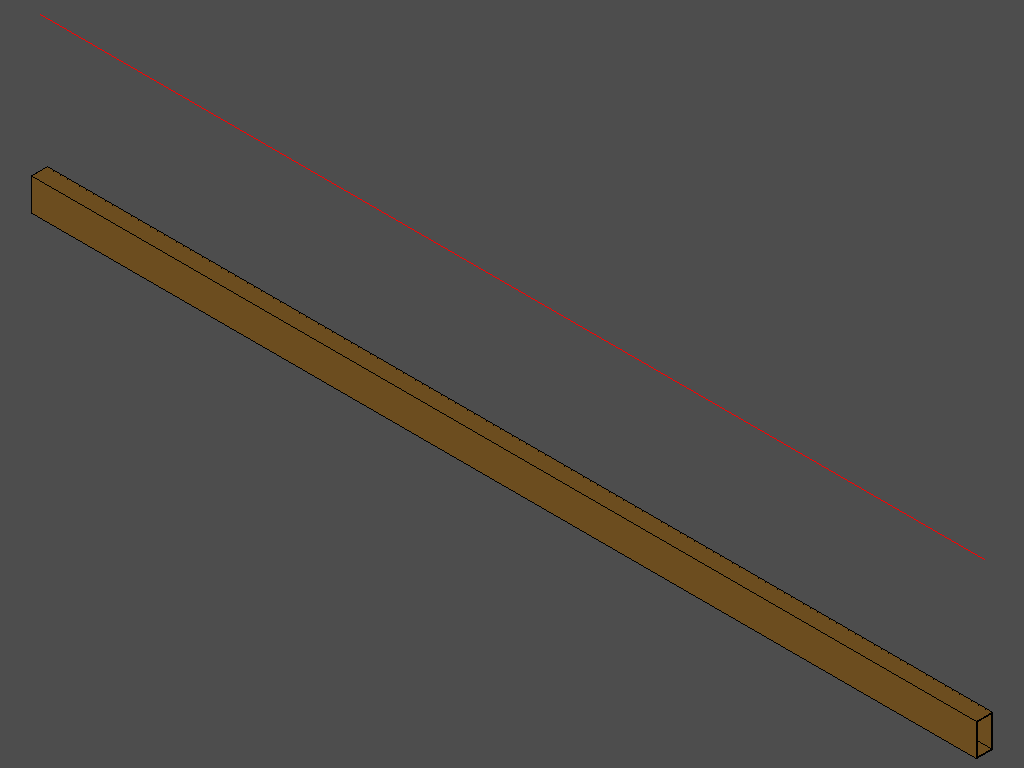

In [18]:
body = shapes['Body'].geometry
axis = shapes['Axis'].geometry
RenderImage(SimpleRenderFunc, modelData=modelData, shapes=[body, axis], size=(100, 800))

As clearly visible in the rendering above, either the `Body` or `Axis` representation is wrong.

Which is actually correct is unknown. However, we decide to "trust" the `Body`, as it is more likely to be caught by visual inspection if wrong.
A warning should be omitted whenever representations do not correspond with each other.